# Задача классификации. Random forest


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [59]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')

In [ ]:
df_cut=df[['Growth','Weight','Sex','Hair length','Children number']]
df_cut=df_cut.dropna()

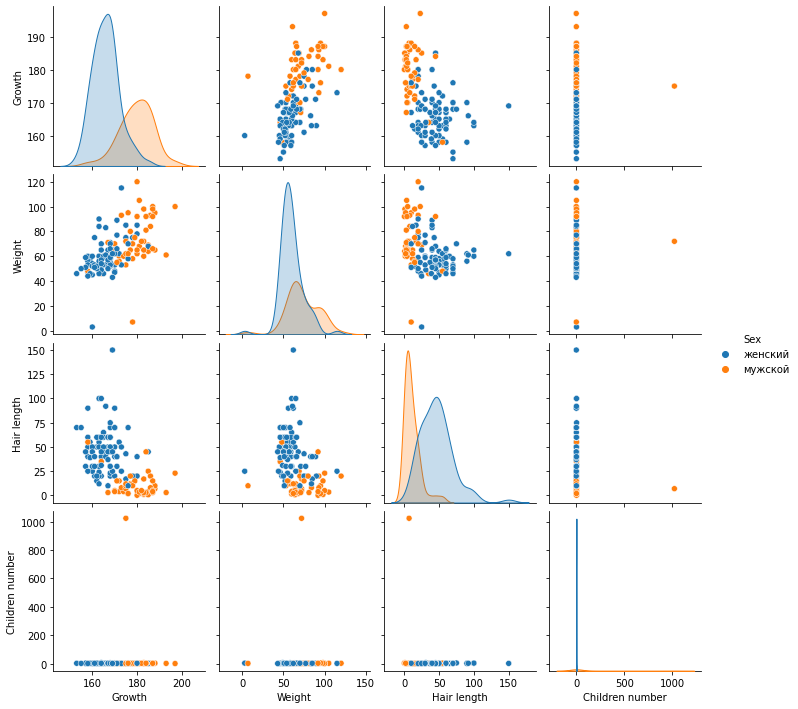

In [ ]:
sns.pairplot(df_cut, hue='Sex')

Гипотеза: угадать пол человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [ ]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

RandomForestClassifier(max_depth=2, random_state=0)

Загружаем тестовую выбоку

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [ ]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))

Метрики качества задачи классификации

In [ ]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,42,1
мужской,0,25


In [ ]:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

In [ ]:
# Кто же он, человек сломавший Random Forest?
df_test_cut[df_test_cut['Code']=='1']

,Growth,Weight,Sex,Hair length,Children number,Predicted,Code
78,175.0,50.0,мужской,40.0,2.0,женский,1


In [ ]:
df_test.iloc[:,6:17].head()

In [ ]:
df.info()

In [80]:
model = RandomForestClassifier(max_depth=4, random_state=0)
model.fit(df.iloc[:,6:17].values.reshape(-1,11), y=df['Your insitute'].values)

RandomForestClassifier(max_depth=4, random_state=0)

Загружаем тестовую выбоку

In [71]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')

In [ ]:
df_test.info()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [81]:
df_test['Predicted']=model.predict(df_test.iloc[:,6:17].values.reshape(-1,11))

Метрики качества задачи классификации

In [82]:
pd.crosstab(df_test['Predicted'],df_test['Your insitute'])

Your insitute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
Predicted,,,,,,,
Другое,1,0,0,1,0,0,0
Естественный (биология-химия-физика-технари),0,5,0,1,0,0,0
Математический и ИТ,5,18,35,6,0,12,2
СоцГум,0,0,1,0,6,0,0
Экономический,1,0,0,0,2,1,0
Юридический,0,0,0,0,1,0,0
